# 🧠 Quantum Image Negation using Cirq 🧠

### 📌 Problem Statement

In classical image processing, image negation is a basic operation where each pixel is inverted (0 becomes 1, and 1 becomes 0). This project aims to replicate that behavior using **quantum computing** principles.

We will:
- Load a **binary (black & white)** image.
- Convert each pixel value into a **qubit**.
- Apply a quantum **NOT gate (X gate)** to invert the qubit's state.
- Measure the qubit to get the negated pixel value.
- Reconstruct and display the **negated image** using classical tools.

---

### ✅ Project Goals

- Simulate quantum logic on classical image data using **Cirq**.
- Perform **pixel-wise quantum negation** using X gates.
- Reconstruct the final image and compare with classical negation.
- Learn how quantum logic gates can be used for classical tasks.

---

### 🛠 Tools Used

- `Cirq` – for building and running quantum circuits.
- `NumPy` – for matrix and pixel data manipulation.
- `Pillow (PIL)` – for image loading and creation.
- `IPython.display` – to view images inside Colab.

---

### 🚀 Extensions (Optional)

- Optimize by processing multiple pixels at once using **multi-qubit circuits**.
- Extend the logic to grayscale or RGB images (advanced).
- Compare classical vs. quantum processing performance and behavior.

---


In [ ]:
!pip install cirq pillow numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 56.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bin.jpg to bin.jpg


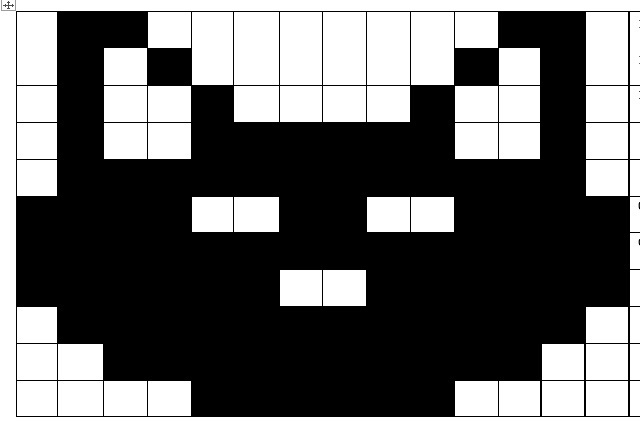

In [ ]:
from PIL import Image
import numpy as np

# Replace with your uploaded image name
image = Image.open("/content/bin.jpg").convert("1")  # '1' mode = binary image
pixel_matrix = np.array(image).astype(int)  # Convert to matrix of 0s and 1s

print("Pixel Matrix (0 = white, 1 = black):")
print(pixel_matrix)


Pixel Matrix (0 = white, 1 = black):
[[1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
import cirq

#define single qubit
qubit=cirq.LineQubit(0)

#create QC
circuit=cirq.Circuit
circuit = cirq.Circuit(cirq.X(qubit))

#show
print("Quantum circuit with X gate")
print(circuit)

Quantum circuit with X gate
0: ───X───


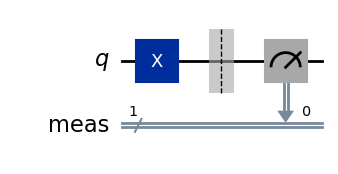

In [ ]:
import cirq
import numpy as np

simulator=cirq.Simulator()
qubit=cirq.LineQubit(0)

negated_matrix=np.zeros_like(pixel_matrix)

for i in range(pixel_matrix.shape[0]):
  for j in range(pixel_matrix.shape[1]):
    circuit=cirq.Circuit()

    if pixel_matrix[i,j] == 1:
      circuit.append(cirq.X(qubit))

    circuit.append(cirq.X(qubit))

    circuit.append(cirq.measure(qubit,key='m'))

    result=simulator.run(circuit, repetitions=1)

    negated_matrix[i,j]=int(result.measurements['m'][0][0])


print("Negated pixel values")
print(negated_matrix)

Negated pixel values
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


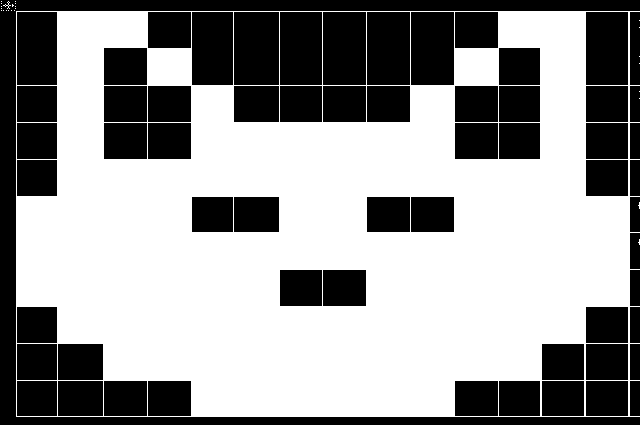

In [ ]:
from PIL import Image
import numpy as np

image_array=(negated_matrix * 255).astype(np.uint8)
negated_image=Image.fromarray(image_array, mode='L')

from IPython.display import display
display(negated_image)

negated_image.save("negated_image.png")